In [38]:
import numpy as np
# Set print options to display floating-point numbers without scientific notation
np.set_printoptions(suppress=True)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

Functions for Logistic Regression

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X.dot(theta))
    cost = (-1/m) * (y.T.dot(np.log(h)) + (1-y).T.dot(np.log(1-h)))
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        h = sigmoid(X.dot(theta))
        gradient = X.T.dot(h - y) / m
        theta -= learning_rate * gradient
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

def predict(X, theta):
    # Use the learned parameters to make predictions
    probabilities = sigmoid(X.dot(theta))
    # Convert probabilities to binary predictions (0 or 1)
    predictions = (probabilities >= 0.5).astype(int)
    return predictions

Data Generation

In [43]:
# Generate some random data for demonstration
np.random.seed(42)
num_samples = 100
num_features = 3

X = np.random.rand(num_samples, num_features)
X2 = np.c_[np.ones((num_samples, 1)), X]  # Add a column of ones for the bias term
y = np.random.randint(2, size=num_samples)

In [46]:
# Initialize parameters
theta = np.zeros(num_features + 1)

# Set hyperparameters
learning_rate = 0.0001
iterations = 10000

# Run gradient descent
theta, cost_history = gradient_descent(X2, y, theta, learning_rate, iterations)

# Print the learned parameters
print("Coefficients:", theta[1:])
print("Intercept:", theta[0])

# Make predictions on the test data
y_pred = predict(X2, theta)
# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy}")


Coefficients: [0.12607089 0.16774079 0.15272413]
Intercept: 0.29988916938717847
Accuracy: 0.54


Logistic Regression using scikit-learn

In [45]:
# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X, y)

# Make predictions on the test data
y_pred = model.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy}")

# Print the learned parameters (coefficients and intercept)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Accuracy: 0.56
Coefficients: [[-0.0236294   0.57514887  0.35064409]]
Intercept: [-0.29545004]


In [47]:
import pandas as pd  

In [48]:
import os
print(os.getcwd())
#change working directory to the location of the data file
os.chdir('/mnt/d/Sajjad/08-2023/Python Code/Introduction to Machine Learning/')
print(os.getcwd())

/mnt/d/Sajjad/08-2023/Python Code/Introduction to Machine Learning
/mnt/d/Sajjad/08-2023/Python Code/Introduction to Machine Learning


In [49]:
df1 = pd.read_csv("default_cc.csv")
df1.head()

,ID,LIMIT_BAL,Gender,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [50]:
#only retain column: LIMIT_BAL, AGE, PAY_0, PAY_1, PAY_2 and default payment next month
df1 = df1[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'default payment next month']]
#except for default payment next month, the rest of the variables are assigned to X while default payment next month is assigned to y
# Create X as a DataFrame
X = df1[['LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3']]
# Create y as a Series
y = df1['default payment next month']

Logistic Regression on default data

In [51]:
# Create a logistic regression model
model = LogisticRegression()
# Train the model on the training data
model.fit(X, y)

# Make predictions on the test data
y_pred = model.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy}")

# Print the learned parameters (coefficients and intercept)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Accuracy: 0.7788
Coefficients: [[-0.00000689 -0.          0.          0.          0.        ]]
Intercept: [-0.]


Our own implementation of LR on default dataset

In [53]:
#number of observations in the data are stored in num_samples
num_samples = X.shape[0]
num_features = X.shape[1]
theta = np.zeros(num_features + 1)

X2 = pd.concat([pd.Series(1, index=X.index, name='bias'), X], axis=1)

print(len(theta))
print(X.shape)
# Set hyperparameters
learning_rate = 0.001
iterations = 1000

# Run gradient descent
theta, cost_history = gradient_descent(X2, y, theta, learning_rate, iterations)

# Print the learned parameters
print("Coefficients:", theta[1:])
print("Intercept:", theta[0])

# Make predictions on the test data
y_pred = predict(X2, theta)
# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy}")

6
(30000, 5)
Coefficients: LIMIT_BAL   NaN
AGE         NaN
PAY_0       NaN
PAY_2       NaN
PAY_3       NaN
dtype: float64
Intercept: nan
Accuracy: 0.7788


Experimenting with LR hyper-parameters

In [54]:
# Create a logistic regression model
model = LogisticRegression(max_iter=1000,C=2, solver='newton-cg')
# Train the model on the training data
model.fit(X, y)

# Make predictions on the test data
y_pred = model.predict(X)

# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy}")

# Print the learned parameters (coefficients and intercept)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Accuracy: 0.8097666666666666
Coefficients: [[-0.00000161  0.009426    0.60109221  0.0730994   0.09533476]]
Intercept: [-1.4682675]


In [55]:
import numpy as np
import matplotlib.pyplot as plt

Gradient Descent for Linear Regression

True Coefficients: [1 2 3 4]
Learned Coefficients: [1.75774145 2.39344376 3.63725509]
Intercept: 1.7213226048690498


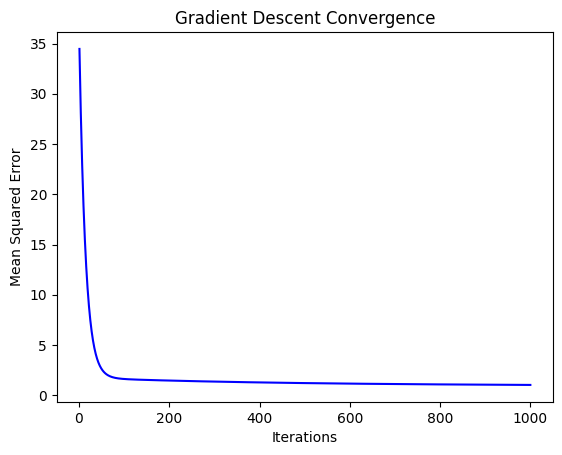

In [56]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        y_pred = X.dot(theta)
        gradient = (2/m) * X.T.dot(y_pred - y)
        theta -= learning_rate * gradient
        cost_history[i] = mse(y, y_pred)

    return theta, cost_history

# Generate some random data for demonstration
np.random.seed(42)
num_samples = 100
num_features = 3

X = np.random.rand(num_samples, num_features)
X = np.c_[np.ones((num_samples, 1)), X]  # Add a column of ones for the bias term
true_coefficients = np.array([1, 2, 3, 4])
y = X.dot(true_coefficients) + np.random.randn(num_samples)  # Adding some noise

# Initialize parameters
theta = np.zeros(num_features + 1)

# Set hyperparameters
learning_rate = 0.01
iterations = 1000

# Run gradient descent
theta, cost_history = gradient_descent(X, y, theta, learning_rate, iterations)

# Print the learned parameters
print("True Coefficients:", true_coefficients)
print("Learned Coefficients:", theta[1:])
print("Intercept:", theta[0])

# Plot the cost history
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Gradient Descent Convergence')
plt.show()
